# Wind danger detector
## Author: Marc Cervera Rosell

In [102]:
import tensorflow as tf
import numpy as np

In [103]:
def read_data_file(file, data_separation='\n'):
  data = []
  with open(file, 'r') as f:
    for line in f:
      value = line.split(data_separation)
      data.append(value[0]) # Ignoring the newline character
  f.close()
  return data

Checking the correctness of the read file method

In [104]:
inputs = read_data_file('inputs.txt') # Reading the inputs file
for i in range(len(inputs)):
  inputs[i] = float(inputs[i])
outputs = read_data_file('outputs.txt') # Reading the outputs file
for i in range(len(outputs)):
  outputs[i] = int(outputs[i])
print("Inputs -> " + "\n")
print(inputs)
print("\n")
print("Outputs -> " + "\n")
print(outputs)
print("\n")

Inputs -> 

[0.4260148509564276, 0.17369735034880784, 0.03885423219761924, 0.48096122515990747, 0.288959645965663, 0.4449675909554571, 0.10097462713976207, 0.04115143436327545, 0.46646480616807834, 0.42539938988350395, 4.262552633264531, 2.6809044832551483, 1.071955224126705, 1.7521489456306605, 2.3150404756008482, 3.6513311135719193, 1.6672562206182033, 2.3398761250027897, 0.7423639646262162, 2.320081020225148, 8.678800490861352, 7.749195117906291, 5.867720333533769, 6.174372910661325, 6.386792067150265, 6.388099114311323, 7.706050648598232, 9.16599813301638, 9.9554901425359, 6.114292911871255, 18.932664272711854, 13.099350347455626, 13.71108756026051, 12.407932020748028, 18.020799984399, 18.387573748975306, 14.694278601117626, 16.825323131022643, 16.6357861670631, 14.80499047645251, 24.42485100449396, 25.064048398132762, 30.22405555350247, 25.682826167665887, 31.412621586447123, 33.8917666945303, 22.60131946801181, 33.163637946182206, 34.999304238707595, 30.111247672185023, 168.15151

In [105]:
values = np.array(inputs, dtype=float) # Inputs of the neuronal network
risk = np.array(outputs, dtype=int) # Outputs of the neuronal network

In [106]:
hidden1 = tf.keras.layers.Dense(units=10, input_shape=[1])
hidden2 = tf.keras.layers.Dense(units=10)
output_layer = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([hidden1, hidden2, output_layer])

In [107]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [108]:
print("Starting training...\n")
historyal = model.fit(inputs, outputs, epochs=1000, verbose=False)
print("Model trained!\n")

Starting training...

Model trained!



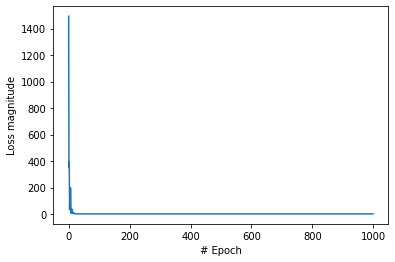

In [109]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(historyal.history["loss"])

In [115]:
import sys
print("Let's make a prediction\n")
wind_gust = 3.0
result = model.predict([wind_gust])
print(f"For a wind gust of {wind_gust} m/s:")
if result == 0 or result <= 0.5:
  print("No risk\n")
elif result > 0.5 or result <= 5:
  print(("Low risk\n"))
elif result > 5 or result <= 10:
  print("Moderate risk\n")
elif result > 10 or result <= 20:
  print("High risk\n")
elif result > 20 or result <= 35:
  print("Very high risk\n")
elif result > 35:
  print("Extreme risk\n") 


Let's make a prediction

For a wind gust of 3.0 m/s:
Low risk

